In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_curve

In [137]:
df=pd.read_csv('C:\\Users\\HP\Desktop\\micro credit defaulter.csv')

In [138]:
df

,sr.no.,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


we have 209593 rows and 37 columns in dataset

In [139]:
df.shape

(209593, 37)

we have 209593 rows and 37 columns

In [140]:
df.dtypes

sr.no.                    int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

This will gives us the different-2 types of columns in the data set having float values, interger values, object etc. we have float values in all independant variables.

In [141]:
df.isnull().sum()

sr.no.                  0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

there is no missing value in our dataset

In [142]:
df.head()

,sr.no.,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


we have first 5 rows and 37 columns in the dataset

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sr.no.                209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

in this we can see there is no null values present in our dataset.

In [144]:
df.columns

Index(['sr.no.', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

in this we can see the indexing of columns in our dataset

In [145]:
df.describe()

,sr.no.,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


in this we can see the description of the dataset having 8 rows and 34 columns. in this we can see the mean, std deviation, minimum and maximum values of columns.

<AxesSubplot:>

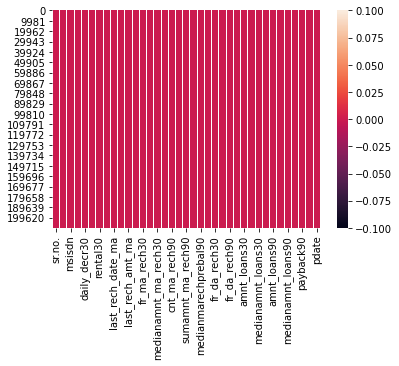

In [146]:
sns.heatmap(df.isnull())

In [147]:
dfcor=df.corr()
dfcor

,sr.no.,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
sr.no.,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


<AxesSubplot:>

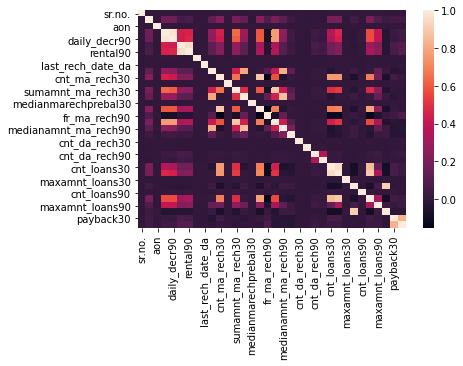

In [148]:
sns.heatmap(dfcor)

In [149]:
sns.color_palette?

In [150]:
sns.heatmap?

<AxesSubplot:>

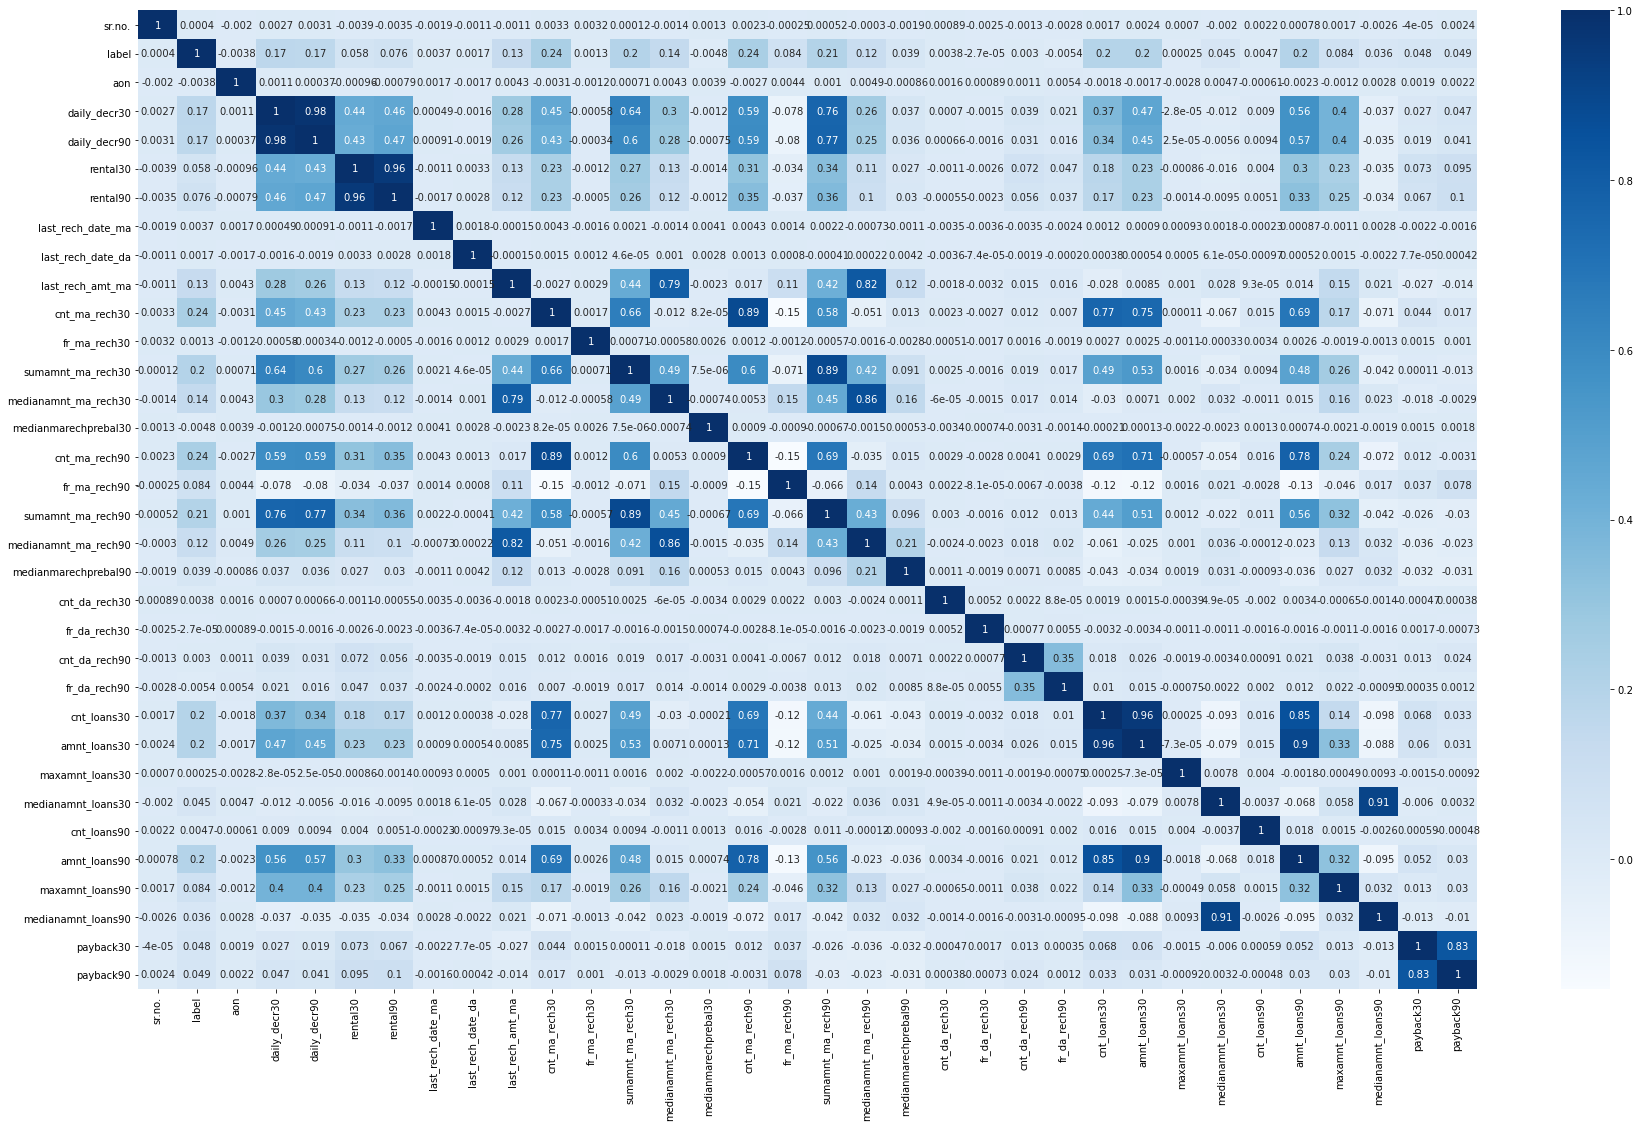

In [151]:
plt.figure(figsize=(30,18))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:>

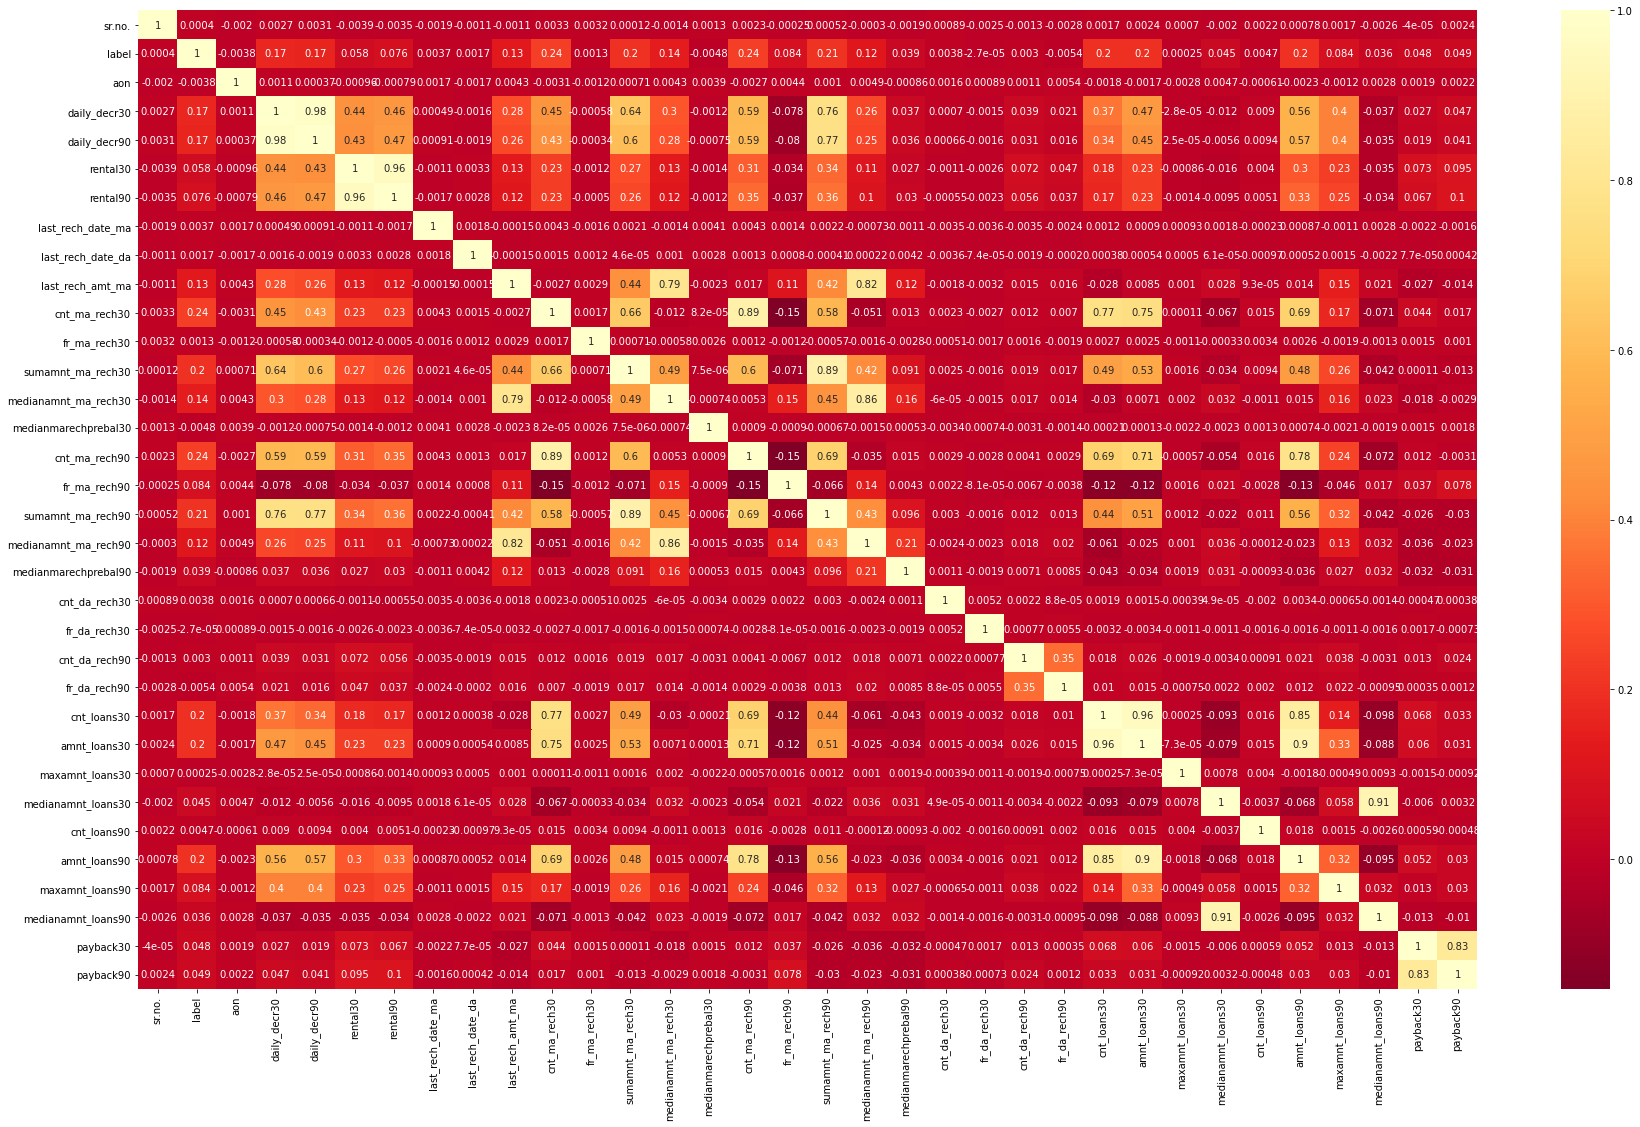

In [152]:
plt.figure(figsize=(30,18))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [153]:
df.columns

Index(['sr.no.', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

<AxesSubplot:>

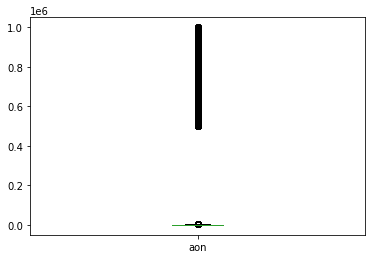

In [154]:
df['aon'].plot.box()

<AxesSubplot:>

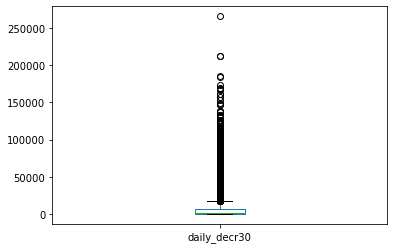

In [155]:
df['daily_decr30'].plot.box()

<AxesSubplot:>

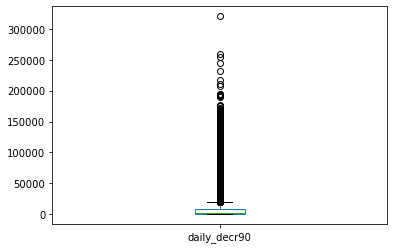

In [156]:
df['daily_decr90'].plot.box()

<AxesSubplot:>

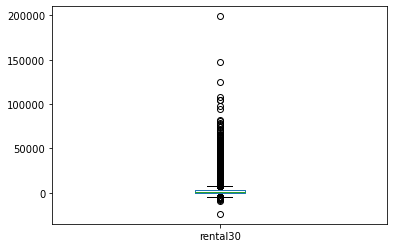

In [157]:
df['rental30'].plot.box()

<AxesSubplot:>

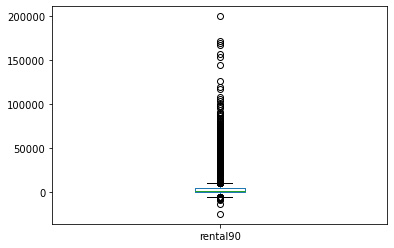

In [158]:
df['rental90'].plot.box()

<AxesSubplot:>

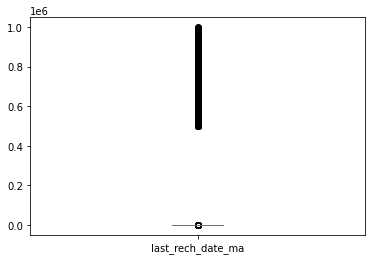

In [159]:
df['last_rech_date_ma'].plot.box()

<AxesSubplot:>

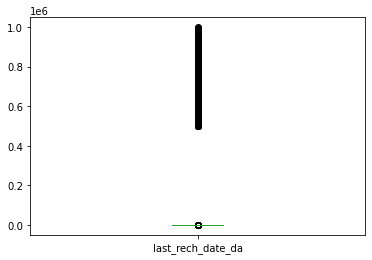

In [160]:
df['last_rech_date_da'].plot.box()

<AxesSubplot:>

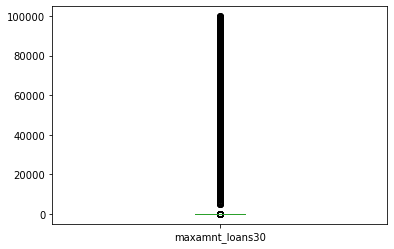

In [161]:
df['maxamnt_loans30'].plot.box()

<AxesSubplot:>

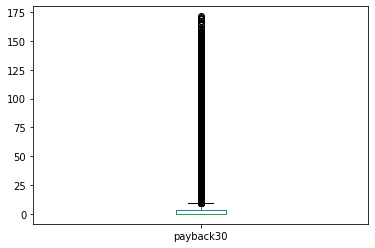

In [162]:
df['payback30'].plot.box()

In [163]:
collist=df.columns.values
ncol=37
nrows=22

In [164]:
plt.subplot?

KeyError: 'pcircle'

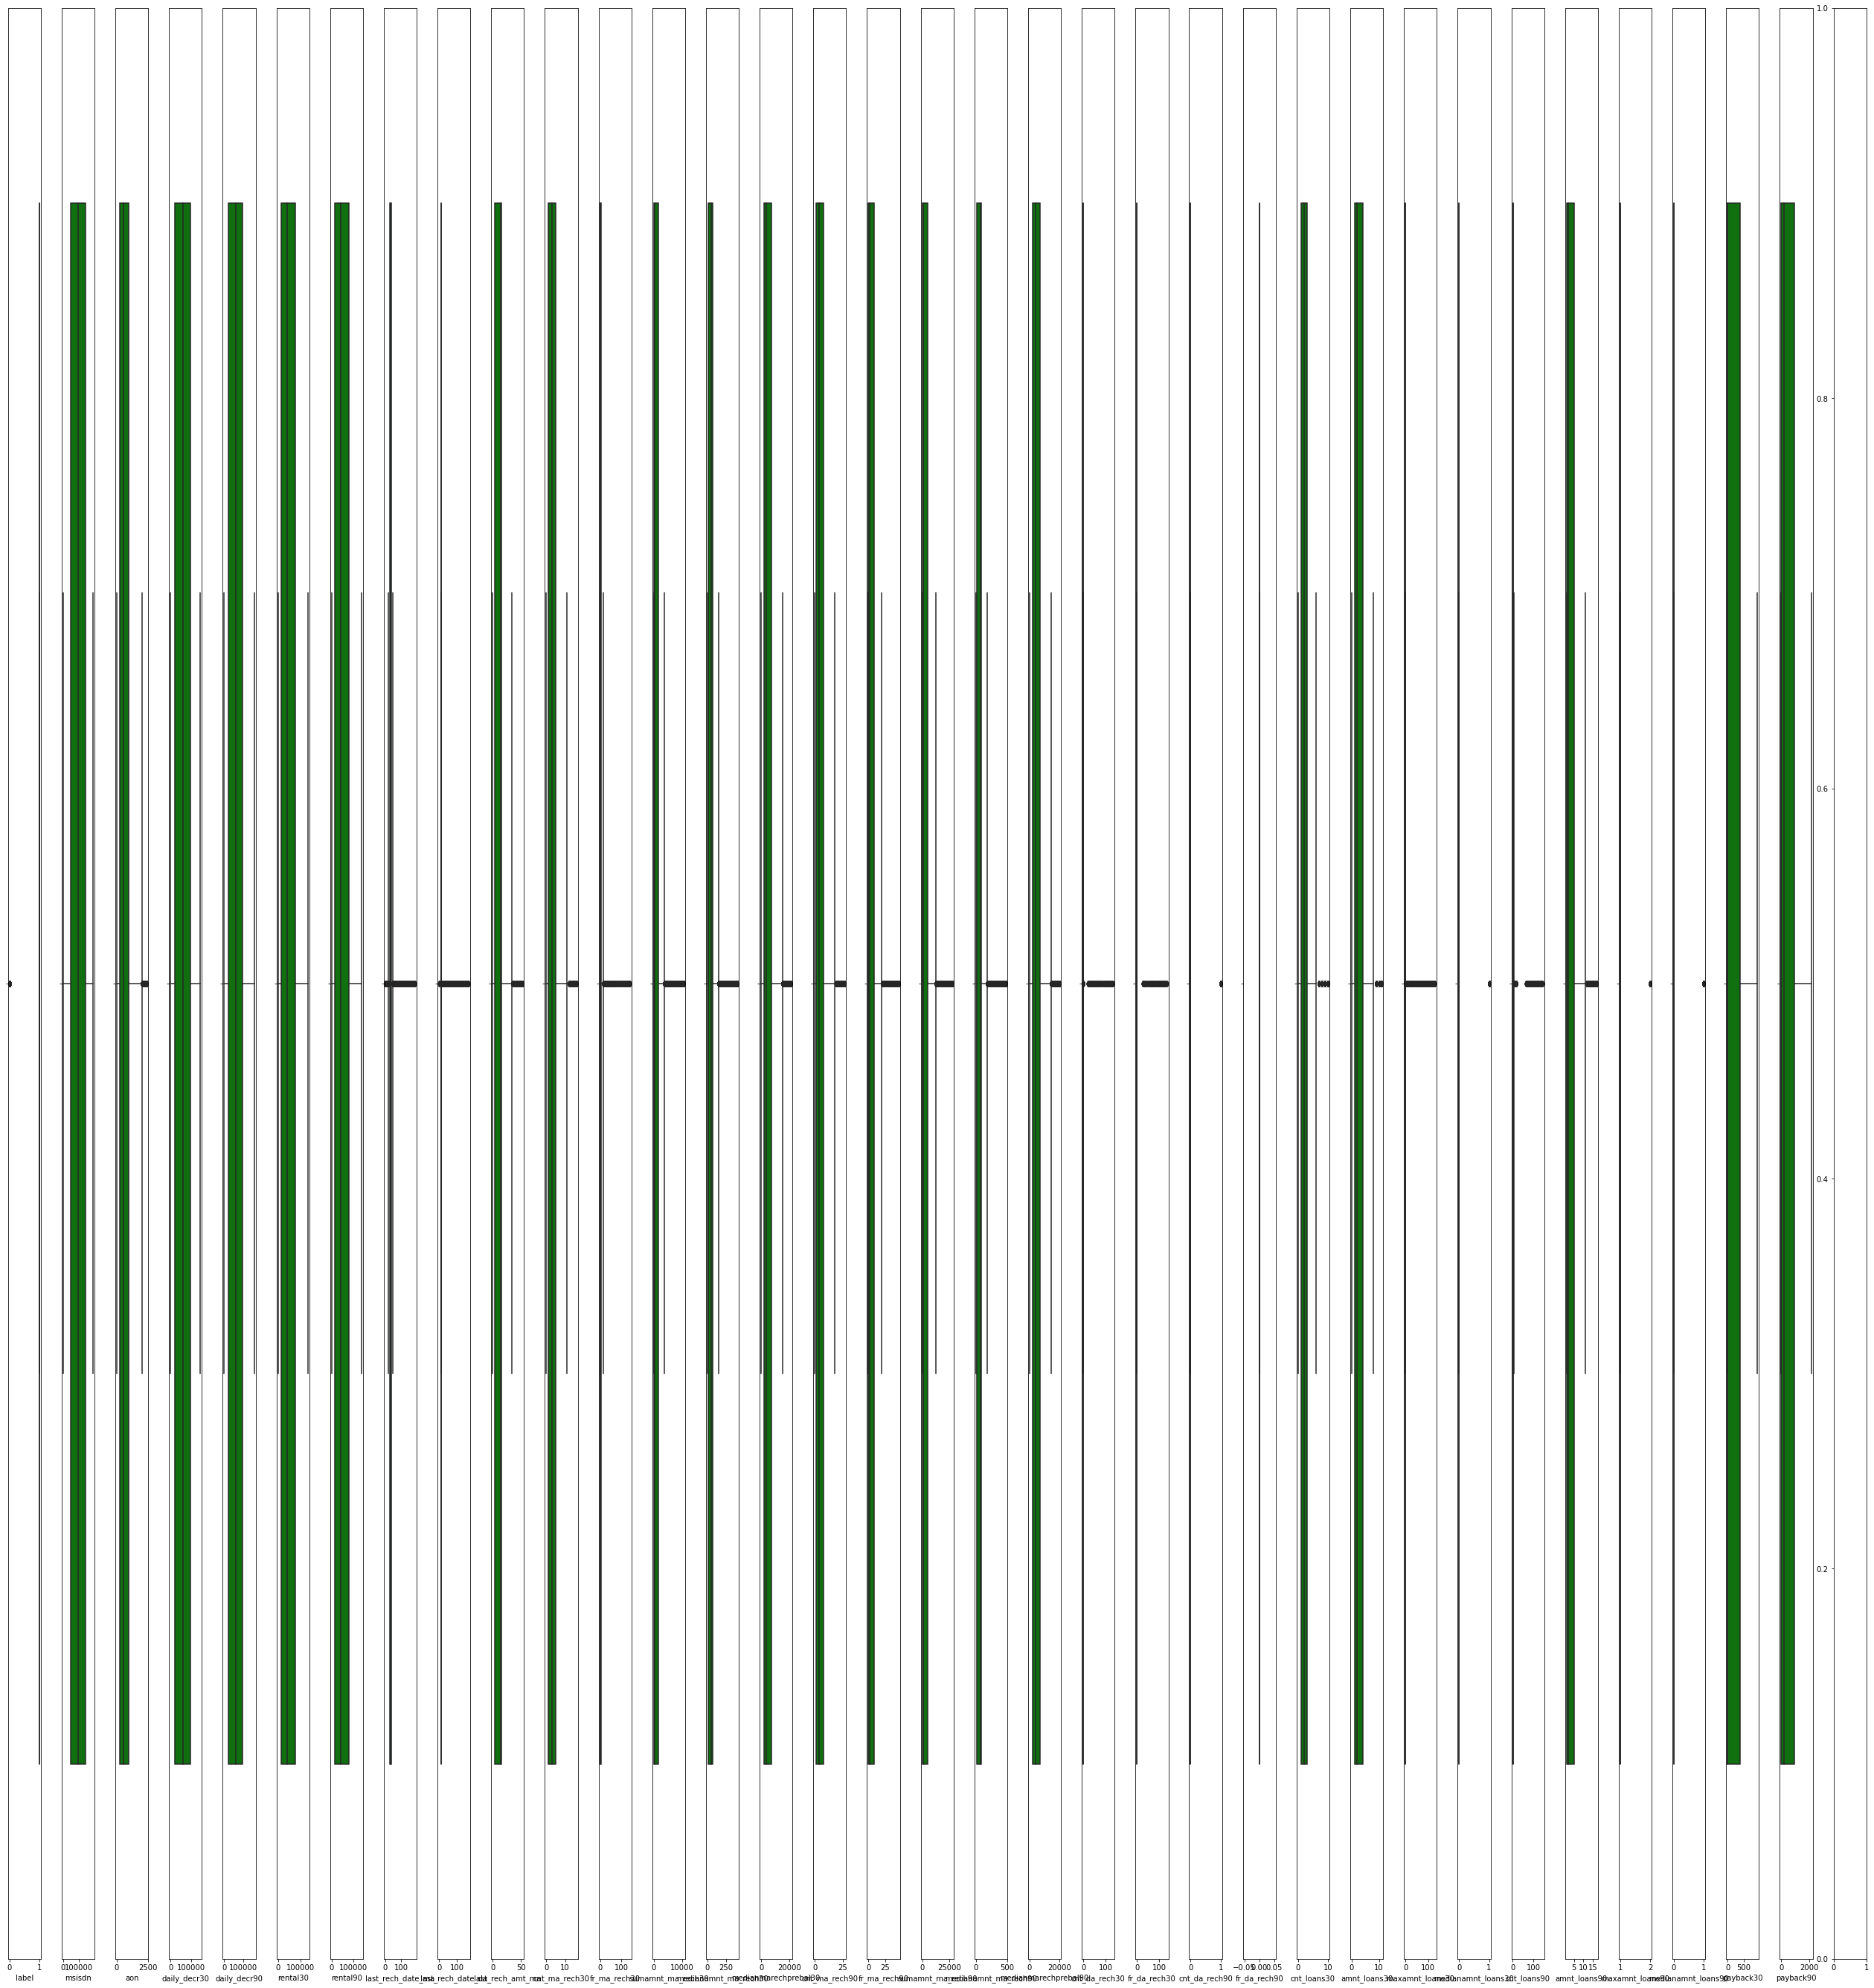

In [237]:
plt.figure(figsize=(ncol,22*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

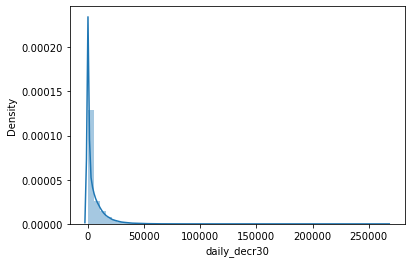

In [166]:
sns.distplot(df['daily_decr30'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aon', ylabel='Density'>

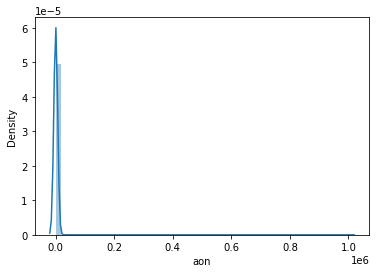

In [167]:
sns.distplot(df['aon'])

In [168]:
df.skew()

sr.no.                   0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [170]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column]=labelencoder.fit_transform(df[column])

In [171]:
df.head()

,sr.no.,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,0,40191,279,80180,76157,13778,14851,31,11,...,1,0,2,2,1,0,850,1749,0,58
1,1,1,142291,719,121168,121370,87076,83052,49,11,...,2,0,1,2,2,0,0,0,0,29
2,2,1,33594,542,64973,62450,38625,34572,32,11,...,1,0,1,1,1,0,0,0,0,56
3,3,1,104157,248,14732,14663,11258,11135,70,11,...,1,0,2,2,1,0,0,0,0,15
4,4,1,6910,954,46794,46656,44372,39798,33,11,...,1,0,7,7,1,0,244,439,0,63


In this we can see there is no categorical value present in the dataset.

we can see columns medianamnt_loans30,medianamnt_loans90 and pcircle is zero hence no contribute to dataset. so we have to remove it.

In [173]:
df['medianamnt_loans30']

0         0
1         0
2         0
3         0
4         0
         ..
209588    0
209589    0
209590    0
209591    0
209592    0
Name: medianamnt_loans30, Length: 209593, dtype: int64

The column medianamnt_loans30 is zero no contribution to dataset

In [174]:
df['medianamnt_loans90']

0         0
1         0
2         0
3         0
4         0
         ..
209588    0
209589    0
209590    0
209591    0
209592    0
Name: medianamnt_loans90, Length: 209593, dtype: int64

The column medianamnt_loans90 is zero no contribution to dataset

In [175]:
df['pcircle']

0         0
1         0
2         0
3         0
4         0
         ..
209588    0
209589    0
209590    0
209591    0
209592    0
Name: pcircle, Length: 209593, dtype: int64

The column pcircle is zero no contribution to dataset

In [176]:
y=df.iloc[:,-1]

In [177]:
y.head()

0    58
1    29
2    56
3    15
4    63
Name: pdate, dtype: int64

In [178]:
y.shape

(209593,)

this shows y is having 209593 rows

In [179]:
x=df.iloc[:,0:8]

In [180]:
x

,sr.no.,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90
0,0,0,40191,279,80180,76157,13778,14851
1,1,1,142291,719,121168,121370,87076,83052
2,2,1,33594,542,64973,62450,38625,34572
3,3,1,104157,248,14732,14663,11258,11135
4,4,1,6910,954,46794,46656,44372,39798
...,...,...,...,...,...,...,...,...
209588,209588,1,42866,411,46895,46756,44066,39548
209589,209589,1,178248,1082,22744,22627,59433,53907
209590,209590,1,53995,1020,120489,120693,104193,116375
209591,209591,1,111388,1739,122031,122679,21540,36833


this shows the 209593 rows and 8 columns.

In [181]:
x.shape

(209593, 8)

In [182]:
y.shape

(209593,)

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.8,random_state=42)

In [185]:
x_train.shape

(41918, 8)

in this we have 41918 rows and 8 columns.

In [186]:
x_test.shape

(167675, 8)

in this we have 167675 rows and 8 columns.

In [187]:
y_train.shape

(41918,)

in this we have 41918 rows

In [188]:
y_test.shape

(167675,)

in this we have 167675 rows.

In [189]:
y_train

69388     57
23347     26
137421    54
163227    81
177624    33
          ..
119879    45
103694    51
131932    34
146867     6
121958    18
Name: pdate, Length: 41918, dtype: int64

In [190]:
df

,sr.no.,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,0,40191,279,80180,76157,13778,14851,31,11,...,1,0,2,2,1,0,850,1749,0,58
1,1,1,142291,719,121168,121370,87076,83052,49,11,...,2,0,1,2,2,0,0,0,0,29
2,2,1,33594,542,64973,62450,38625,34572,32,11,...,1,0,1,1,1,0,0,0,0,56
3,3,1,104157,248,14732,14663,11258,11135,70,11,...,1,0,2,2,1,0,0,0,0,15
4,4,1,6910,954,46794,46656,44372,39798,33,11,...,1,0,7,7,1,0,244,439,0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209588,1,42866,411,46895,46756,44066,39548,30,11,...,1,0,2,2,1,0,1,1,0,48
209589,209589,1,178248,1082,22744,22627,59433,53907,33,11,...,1,0,3,3,1,0,1,1,0,33
209590,209590,1,53995,1020,120489,120693,104193,116375,32,11,...,2,0,6,9,2,0,380,802,0,78
209591,209591,1,111388,1739,122031,122679,21540,36833,31,49,...,2,0,3,4,2,0,0,1300,0,70


In [191]:
df.head()

,sr.no.,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,0,40191,279,80180,76157,13778,14851,31,11,...,1,0,2,2,1,0,850,1749,0,58
1,1,1,142291,719,121168,121370,87076,83052,49,11,...,2,0,1,2,2,0,0,0,0,29
2,2,1,33594,542,64973,62450,38625,34572,32,11,...,1,0,1,1,1,0,0,0,0,56
3,3,1,104157,248,14732,14663,11258,11135,70,11,...,1,0,2,2,1,0,0,0,0,15
4,4,1,6910,954,46794,46656,44372,39798,33,11,...,1,0,7,7,1,0,244,439,0,63


In [233]:
df.drop('pcircle',axis=1,inplace=True)

KeyError: "['pcircle'] not found in axis"

In [196]:
df.head()

,sr.no.,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,0,40191,279,80180,76157,13778,14851,31,11,...,2,1,0,2,2,1,0,850,1749,58
1,1,1,142291,719,121168,121370,87076,83052,49,11,...,2,2,0,1,2,2,0,0,0,29
2,2,1,33594,542,64973,62450,38625,34572,32,11,...,1,1,0,1,1,1,0,0,0,56
3,3,1,104157,248,14732,14663,11258,11135,70,11,...,2,1,0,2,2,1,0,0,0,15
4,4,1,6910,954,46794,46656,44372,39798,33,11,...,7,1,0,7,7,1,0,244,439,63


in this we have 5 rows and 36 columns.

In [197]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column]=labelencoder.fit_transform(df[column])

In [198]:
df.head()

,sr.no.,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,0,40191,279,80180,76157,13778,14851,31,11,...,2,1,0,2,2,1,0,850,1749,58
1,1,1,142291,719,121168,121370,87076,83052,49,11,...,2,2,0,1,2,2,0,0,0,29
2,2,1,33594,542,64973,62450,38625,34572,32,11,...,1,1,0,1,1,1,0,0,0,56
3,3,1,104157,248,14732,14663,11258,11135,70,11,...,2,1,0,2,2,1,0,0,0,15
4,4,1,6910,954,46794,46656,44372,39798,33,11,...,7,1,0,7,7,1,0,244,439,63


in this we have 5 rows and 36 columns.

In [199]:
df['medianamnt_loans90']

0         0
1         0
2         0
3         0
4         0
         ..
209588    0
209589    0
209590    0
209591    0
209592    0
Name: medianamnt_loans90, Length: 209593, dtype: int64

this shows the columns name and length is 209593

In [200]:
df[['sr.no.','rental30']].groupby(['rental30'],
as_index=False).mean().sort_values(by='rental30',ascending=False)                                  

,rental30,sr.no.
131337,131337,164452.0
131336,131336,120277.0
131335,131335,193158.0
131334,131334,196766.0
131333,131333,62089.0
...,...,...
4,4,83909.0
3,3,18948.0
2,2,148132.0
1,1,154995.0


this shows the 131338 rows and 2 columns.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


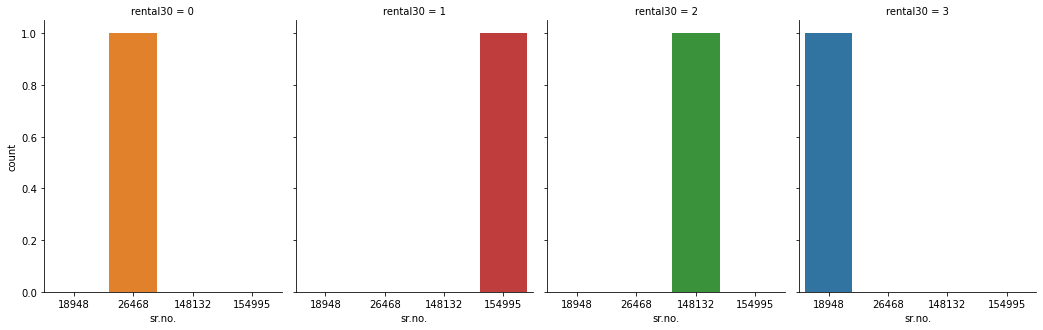

In [201]:
new_var=df[['sr.no.','rental30']]
new_var=new_var[new_var['rental30']<=3.5]

sns.factorplot('sr.no.',col='rental30',data=new_var,kind='count',size=4.5,aspect=.8,col_wrap=4);

this shows the dataset is almost balanced.

In [202]:
from scipy.stats import zscore
import numpy as np

In [203]:
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([    21,     22,     28, ..., 209587, 209587, 209587], dtype=int64), array([17, 17, 13, ..., 15, 28, 32], dtype=int64))


This shows the z score value when zscr>3 and threshold value is equal to 3.

In [204]:
dfnew=df[(zscr<3).all(axis=1)]

In [205]:
df=dfnew

In [206]:
df_x=df.drop(columns=['label'])
y=df[['label']]

In [207]:
for i in df_x.columns:
    if df_x[i].skew()>0.5:
       df_x[i]=np.cbrt(df_x[i])
    if df_x[i].skew()<0.5:
        df_x[i]=np.cbrt(df_x[i])
        
df_x.skew() 

sr.no.                  -0.860626
msisdn                  -0.861182
aon                     -1.035045
daily_decr30            -0.697955
daily_decr90            -0.645533
rental30                -0.509962
rental90                -0.480998
last_rech_date_ma      -13.722046
last_rech_date_da        8.532527
last_rech_amt_ma        -2.116065
cnt_ma_rech30           -1.783963
fr_ma_rech30            -0.404497
sumamnt_ma_rech30       -1.089259
medianamnt_ma_rech30    -1.623588
medianmarechprebal30    -0.084025
cnt_ma_rech90           -2.043750
fr_ma_rech90            -0.550341
sumamnt_ma_rech90       -1.124713
medianamnt_ma_rech90    -1.926915
medianmarechprebal90    -0.195639
cnt_da_rech30           19.365811
fr_da_rech30            45.367529
cnt_da_rech90            6.940487
fr_da_rech90             0.000000
cnt_loans30             -4.270793
amnt_loans30            -4.108337
maxamnt_loans30          6.481062
medianamnt_loans30       5.376478
cnt_loans90              0.956126
amnt_loans90  

This shows the skewness of different-2 values of the column in the dataset.

In [208]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)

x=pd.DataFrame(x,columns=df_x.columns)
x

,sr.no.,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,-3.872361,-0.772623,-0.580590,0.588688,0.527242,-0.828912,-0.786913,-0.220005,-0.131128,0.415983,...,-0.031378,-0.165584,-0.179973,-0.320696,-0.362126,-0.335432,-0.15818,1.236206,1.125468,0.748248
1,-3.785440,0.847632,0.447754,1.117184,1.115977,0.985069,0.881455,1.039856,-0.131128,0.777067,...,-0.031378,1.768652,-0.179973,-0.986743,-0.362126,2.981234,-0.15818,-0.964834,-1.061552,-0.142460
2,-3.762847,-0.951971,0.129368,0.346210,0.303037,0.139347,-0.007789,-0.134692,-0.131128,0.415983,...,-0.711315,-0.165584,-0.179973,-0.986743,-1.020814,-0.335432,-0.15818,-0.964834,-1.061552,0.698040
3,-3.746999,0.382271,-0.701136,-0.956789,-0.953000,-1.005993,-1.036165,2.066740,-0.131128,0.303059,...,-0.031378,-0.165584,-0.179973,-0.320696,-0.362126,-0.335432,-0.15818,-0.964834,-1.061552,-0.818506
4,-3.734382,-2.145059,0.776540,0.000160,-0.000628,0.278309,0.129271,-0.051717,-0.131128,0.590497,...,1.338572,-0.165584,-0.179973,1.352642,1.292721,-0.335432,-0.15818,0.951197,0.814090,0.868912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161116,1.290797,-0.705505,-0.172808,0.002312,0.001496,0.271326,0.123090,-0.307800,-0.131128,0.700156,...,-0.031378,-0.165584,-0.179973,-0.320696,-0.362126,-0.335432,-0.15818,0.075414,-0.107564,0.484307
161117,1.290805,1.215109,0.926271,-0.639631,-0.638291,0.578187,0.432103,-0.051717,-0.131128,0.139489,...,0.391322,-0.165584,-0.179973,0.146521,0.099928,-0.335432,-0.15818,0.075414,-0.107564,0.008360
161118,1.290814,-0.452901,0.855834,1.109492,1.108354,1.182302,1.247495,-0.134692,-0.131128,0.415983,...,1.338572,1.768652,-0.179973,1.107127,1.716316,2.981234,-0.15818,1.047868,0.943977,1.196393
161119,1.290822,0.478346,1.509777,1.126918,1.130634,-0.422774,0.053625,-0.220005,6.524725,0.139489,...,0.391322,1.768652,-0.179973,0.146521,0.467768,2.981234,-0.15818,-0.964834,1.054550,1.027553


In this we have 161121 rows and 35 columns.

In [209]:
df.skew()

sr.no.                   0.000692
label                   -2.070867
msisdn                  -0.000647
aon                      0.971941
daily_decr30             0.158536
daily_decr90             0.290760
rental30                 0.569828
rental90                 0.590187
last_rech_date_ma        3.573543
last_rech_date_da       10.609425
last_rech_amt_ma         1.003955
cnt_ma_rech30            1.132462
fr_ma_rech30             3.706119
sumamnt_ma_rech30        2.273853
medianamnt_ma_rech30     2.134505
medianmarechprebal30     1.350156
cnt_ma_rech90            1.292209
fr_ma_rech90             2.024126
sumamnt_ma_rech90        1.923431
medianamnt_ma_rech90     2.210625
medianmarechprebal90     1.320550
cnt_da_rech30           51.109835
fr_da_rech30            52.026714
cnt_da_rech90            6.940487
fr_da_rech90             0.000000
cnt_loans30              1.427081
amnt_loans30             1.411230
maxamnt_loans30         47.372545
medianamnt_loans30       5.376478
cnt_loans90   

thses shows the float value occurs in the dataset observing the skewness of the columns.

In [210]:
from sklearn.model_selection import train_test_split
y=df['label'].values
x=df.drop(['label'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(125674, 35)
(35447, 35)
(125674,)
(35447,)


this shows the shapes of x,y having train and test methods.

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [213]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8648404660479025
[[  354  4603]
 [  188 30302]]
              precision    recall  f1-score   support

           0       0.65      0.07      0.13      4957
           1       0.87      0.99      0.93     30490

    accuracy                           0.86     35447
   macro avg       0.76      0.53      0.53     35447
weighted avg       0.84      0.86      0.82     35447



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In this accuracy score is 86%

In [214]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.868677180015234
[[ 2704  2253]
 [ 2402 28088]]
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      4957
           1       0.93      0.92      0.92     30490

    accuracy                           0.87     35447
   macro avg       0.73      0.73      0.73     35447
weighted avg       0.87      0.87      0.87     35447



In this accuracy score is 87%

In [215]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score:
0.6770953818376731
[[ 3987   970]
 [10476 20014]]
              precision    recall  f1-score   support

           0       0.28      0.80      0.41      4957
           1       0.95      0.66      0.78     30490

    accuracy                           0.68     35447
   macro avg       0.61      0.73      0.59     35447
weighted avg       0.86      0.68      0.73     35447



in this accuracy score is 68 %

In [216]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9119812678082772
[[ 2482  2475]
 [  645 29845]]
              precision    recall  f1-score   support

           0       0.79      0.50      0.61      4957
           1       0.92      0.98      0.95     30490

    accuracy                           0.91     35447
   macro avg       0.86      0.74      0.78     35447
weighted avg       0.91      0.91      0.90     35447



In this accuracy score is 91%

In [217]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [218]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.67779674 0.68061072 0.67645233 0.67468347 0.67772468]
0.6774535886498159


In [219]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.9119007  0.91317031 0.91106008 0.91348064 0.90429494]
0.9107813313015255


In [220]:
score=cross_val_score(dt,x,y,cv=5)
print(score)
print(score.mean())

[0.81750194 0.87028302 0.87248635 0.86671425 0.51781281]
0.7889596729025603


In [221]:
from sklearn.model_selection import GridSearchCV

In [222]:
parameter = {'max_depth': np.arange(2,10),
             'criterion':['gini','entropy']}

In [223]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [224]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [225]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [226]:
joblib.dump(rf,'micro credit defaulterrf.obj')

['micro credit defaulterrf.obj']

In [228]:
microcreditdefaulterfile=joblib.load('micro credit defaulterrf.obj')
microcreditdefaulterfile.predict(x_train)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [229]:
model=[lg,gnb,dt,rf]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

accuracy score: LogisticRegression()
0.8648404660479025
[[  354  4603]
 [  188 30302]]
              precision    recall  f1-score   support

           0       0.65      0.07      0.13      4957
           1       0.87      0.99      0.93     30490

    accuracy                           0.86     35447
   macro avg       0.76      0.53      0.53     35447
weighted avg       0.84      0.86      0.82     35447

[0.86395656 0.86330065 0.86466609 0.86354891 0.86472815]
0.864040069783047
accuracy score: GaussianNB()
0.6770953818376731
[[ 3987   970]
 [10476 20014]]
              precision    recall  f1-score   support

           0       0.28      0.80      0.41      4957
           1       0.95      0.66      0.78     30490

    accuracy                           0.68     35447
   macro avg       0.61      0.73      0.59     35447
weighted avg       0.86      0.68      0.73     35447

[0.67779674 0.68061072 0.67645233 0.67468347 0.67772468]
0.6774535886498159
accuracy score: DecisionTreeC

In this we have different-2 accuracy score occurs. random forest occurs the maximum occuracy which is 91%.

In [231]:
joblib.dump(rf,'rfmodel.obj')

['rfmodel.obj']

In [232]:
rffile=joblib.load('rfmodel.obj')
rffile.predict(x_train)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)